In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [2]:
# Suppose we have the following ODE, describing a system (e.g. the rate of change for a quantity):
# dv/dt=-0.5v(t)+5sin(2t)+10 , with v(0)=0
# let's say that v is voltage and t time

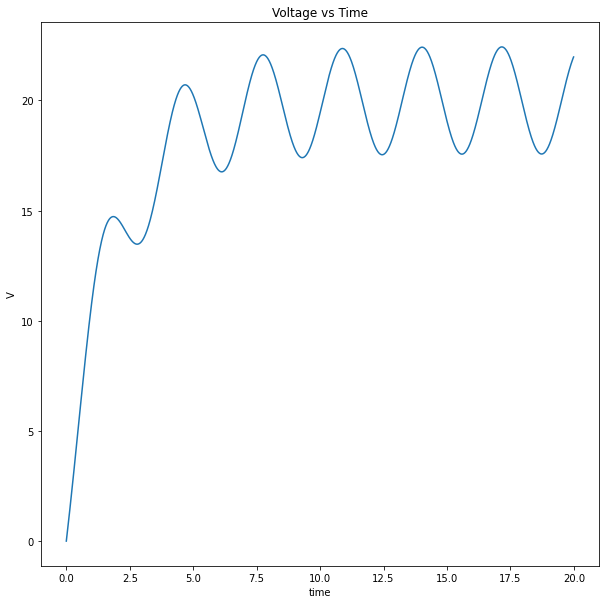

In [3]:
### plotting v(t) utilizing discrete-time integration using the Euler method (without analytically solving the ODE)
v=0
dt=0.01
x=[]
V=[]
for t in list(np.arange(0.0,20,0.01)):
    V.append(v)
    x.append(t)    
    v=v+dt*(-0.5*v+5*math.sin(2*t)+10)

plt.figure()
plt.title("Voltage vs Time")
plt.xlabel("time")
plt.ylabel("V")
plt.plot(x,V)
plt.show()

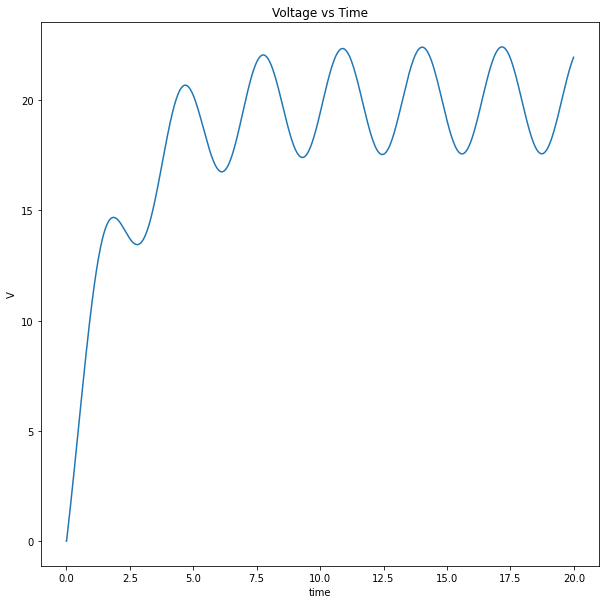

In [4]:
### analytical solution of the ODE, function in closed form
# v(t)=20-(40/17)cos(2t)+(10/17)sin(2t)-(300/17)e^(-t/2)
v=0
x=[]
V=[]
for t in list(np.arange(0.0,20,0.01)):
    V.append(v)
    x.append(t)    
    v=20-(40/17)*math.cos(2*t)+(10/17)*math.sin(2*t)-(300/17)*math.exp(-t/2)
    
plt.figure()
plt.title("Voltage vs Time")
plt.xlabel("time")
plt.ylabel("V")
plt.plot(x,V)
plt.show()

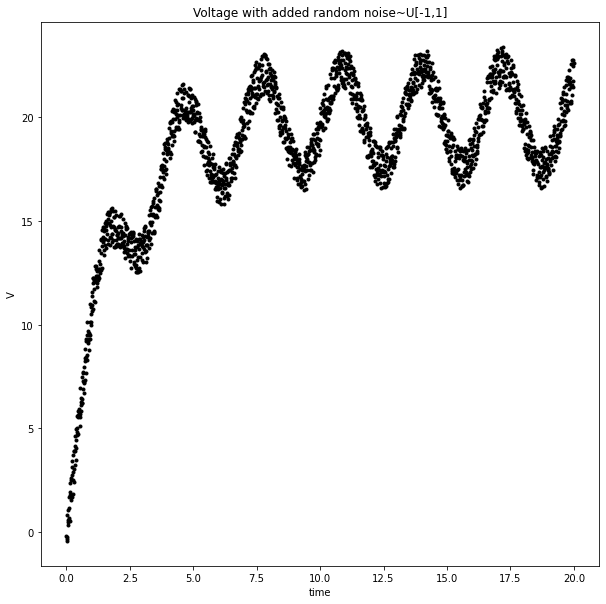

In [5]:
### what if we add some noise from uniform distribution [-1,1]?

# Set random number generator
np.random.seed(20000)

# Initialize the figure
plt.figure()
plt.title('Voltage with added random noise~U[-1,1]')
plt.xlabel('time')
plt.ylabel('V')

v=0
for t in list(np.arange(0.0,20,0.01)):
    random_num = np.random.uniform(low=-1.0,high=1.0)
    v=20-(40/17)*math.cos(2*t)+(10/17)*math.sin(2*t)-(300/17)*math.exp(-t/2)+random_num
    plt.plot(t, v, 'k.')


plt.show()

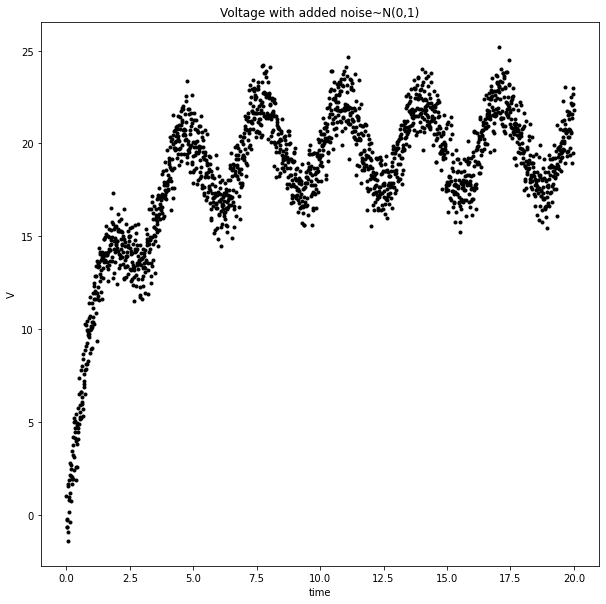

In [7]:
### what if we add some noise from standard normal distribution N(0,1)?

# Set random number generator
np.random.seed(20000)

# Initialize the figure
plt.figure()
plt.title('Voltage with added noise~N(0,1)')
plt.xlabel('time')
plt.ylabel('V')

v=0
V=[]
T=[]
for t in list(np.arange(0.0,20,0.01)):
    V.append(v)
    T.append(t)
    random_num = np.random.normal(loc=0.0,scale=1.0)
    v=20-(40/17)*math.cos(2*t)+(10/17)*math.sin(2*t)-(300/17)*math.exp(-t/2)+random_num
    plt.plot(t, v, 'k.')


# Display plot
plt.show()

In [8]:
# In the above cell, we stored each data point in V. In other words, we created a dataset derived from the (deterministic) 
# equation with the addition of Gaussian noise. 
### Let's say that we came across this data for the first time, without having any deterministic ODE describing the mechanism
### that produces it. Would it be possible to use regression in order to estimate the general nonlinear equation 
### describing the data? Of course, there are endless possibilites for nonlinear models that may fit this data. 

In [9]:
# From a mechanistic point of view, good candidates are functions that are linear combinations of sine and cosine functions. 
# We also observe on the scatter plot that in the range (0.0,5.0) of time, there is a smooth increase, and from 5 and forward 
# the "graph" converges to a periodic oscillation around a fixed line (clearly shown if we plot for t in the range (0,200). 
# This can indicate that the function/model we are looking for is a linear combination (LC) of two components: 
# a trigonometric one (LC of sine and cosine) and a function that is concave down and has a horizontal asymptote 
# (the supremum of this function) as t->+oo. There are still many candidate functions
# with the latter property, with one such being f(t)=a*exp(-bt+c)+d, a<0, b>0, c,d real numbers. In this case, the asymptote is
# the line v(t)=d (which in our data is v=20). Considering the above, it would be mathematically sensible to try a regression 
# model with the general form v(t)=b0+b1*cos(b2*t)+b3*sin(b4*t)+b5*e^(b6*t), with b1,...,b6 the parameters we want to estimate

# in a real life setting, considering all the mathematical details mentioned above would be useful in order to choose a set of
# candidate functions and then select the best performing models (for example with methods like genetic algorithms)

C:\Users\fysek\AppData\Local\Temp\ipykernel_11136\3061084401.py:22: RuntimeWarning: overflow encountered in exp
  optimize_func = lambda x: x[4]*np.cos(x[0]*t)+x[5]*np.sin(x[1]*t) + x[2]*np.exp(-x[3]*t)+x[6] - data
C:\Users\fysek\AppData\Local\Temp\ipykernel_11136\3061084401.py:22: RuntimeWarning: overflow encountered in multiply
  optimize_func = lambda x: x[4]*np.cos(x[0]*t)+x[5]*np.sin(x[1]*t) + x[2]*np.exp(-x[3]*t)+x[6] - data


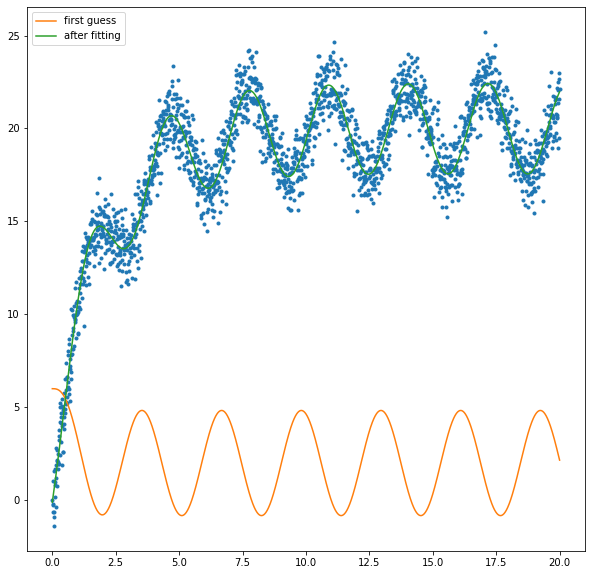

In [10]:
from scipy.optimize import leastsq
import pylab as plt

N = len(V) # number of data points
t = np.linspace(0, 20, N)
data = np.array(V) # create artificial data with added noise~N(0,1)

x0=2
x1=2
x2=2
x3=2
x4=2
x5=2
x6=2

# plotting the first estimate
data_first_guess=x4*np.cos(x0*t)+x5*np.sin(x1*t) + x2*np.exp(-x3*t)+x6
##data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean

# Define the function to optimize, in this case, we want to minimize the difference
# between the actual data and our "guessed" parameters
optimize_func = lambda x: x[4]*np.cos(x[0]*t)+x[5]*np.sin(x[1]*t) + x[2]*np.exp(-x[3]*t)+x[6] - data
est_x0, est_x1, est_x2, est_x3, est_x4, est_x5, est_x6 = leastsq(optimize_func, [x0, x1, x2, x3,x4,x5,x6])[0]


# recreate the fitted curve using the optimized parameters

fine_t = np.linspace(0, 20, N)#np.arange(0,max(t),0.1)
data_fit = est_x4*np.cos(est_x0*t)+est_x5*np.sin(est_x1*t) + est_x2*np.exp(-est_x3*t)+est_x6

plt.plot(t, data, '.')
plt.plot(t, data_first_guess, label='first guess')
plt.plot(fine_t, data_fit, label='after fitting')
plt.legend()
plt.show()

In [11]:
print(np.round(np.array([est_x0, est_x1, est_x2, est_x3, est_x4, est_x5, est_x6])))

[  2.   2. -18.   1.  -2.   0.  20.]


In [ ]:
# after some trial & error with initial values of x0,...,x6, we can see that the final model fits very well our data